In [71]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import scikitplot as skplt
from sklearn import metrics
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('PourModele.csv')

In [3]:
df.shape

(39802, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39802 entries, 0 to 39801
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Numero_inspection  39802 non-null  object 
 1   id_etablissement   39802 non-null  int64  
 2   id_activite        39802 non-null  int64  
 3   synthese_eval      39802 non-null  object 
 4   année              39802 non-null  int64  
 5   mois               39802 non-null  int64  
 6   jour               39802 non-null  int64  
 7   jourSem            39802 non-null  int64  
 8   code_postal        39802 non-null  object 
 9   Departement        39802 non-null  int64  
 10  GPS1               39802 non-null  float64
 11  GPS2               39802 non-null  float64
 12  nb_activités       39802 non-null  int64  
 13  nb_agréments       39802 non-null  int64  
 14  Satis_Dpt          39802 non-null  float64
 15  TSat_Dpt           39802 non-null  float64
 16  Amél_Dpt           398

In [11]:
y = df.synthese_eval
y[:10]

0         Satisfaisant
1    Très satisfaisant
2    Très satisfaisant
3         Satisfaisant
4         Satisfaisant
5         Satisfaisant
6         Satisfaisant
7    Très satisfaisant
8    Très satisfaisant
9          A améliorer
Name: synthese_eval, dtype: object

In [13]:
y[df.synthese_eval=='Satisfaisant']=3
y[df.synthese_eval=='Très satisfaisant']=4
y[df.synthese_eval=='A améliorer']=2
y[df.synthese_eval=='A corriger de manière urgente']=1

/tmp/ipykernel_443295/2546488975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[df.synthese_eval=='Satisfaisant']=3
/tmp/ipykernel_443295/2546488975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[df.synthese_eval=='Très satisfaisant']=4
/tmp/ipykernel_443295/2546488975.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[df.synthese_eval=='A améliorer']=2
/tmp/ipykernel_443295/2546488975.py:4: SettingWithCopyWarning: 
A 

0    3
1    4
2    4
3    3
4    3
5    3
6    3
7    4
8    4
9    2
Name: synthese_eval, dtype: object

In [14]:
y.value_counts()

3    20696
4    17052
2     1915
1      139
Name: synthese_eval, dtype: int64

In [33]:

classifier = DecisionTreeRegressor()



In [17]:
df.keys()

Index(['Numero_inspection', 'id_etablissement', 'id_activite', 'synthese_eval',
       'année', 'mois', 'jour', 'jourSem', 'code_postal', 'Departement',
       'GPS1', 'GPS2', 'nb_activités', 'nb_agréments', 'Satis_Dpt', 'TSat_Dpt',
       'Amél_Dpt', 'UrgCorr_Dpt', 'Satis_Act', 'TSat_Act', 'Amél_Act',
       'UrgCorr_Act'],
      dtype='object')

In [37]:
df.id_activite.value_counts()

2     10413
15     8767
27     2055
11     1857
17     1630
      ...  
4         3
68        3
70        2
71        2
72        2
Name: id_activite, Length: 72, dtype: int64

In [38]:
X=df.drop(['synthese_eval', 'Numero_inspection', 'code_postal', 'id_etablissement'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39802 entries, 0 to 39801
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_activite   39802 non-null  int64  
 1   année         39802 non-null  int64  
 2   mois          39802 non-null  int64  
 3   jour          39802 non-null  int64  
 4   jourSem       39802 non-null  int64  
 5   Departement   39802 non-null  int64  
 6   GPS1          39802 non-null  float64
 7   GPS2          39802 non-null  float64
 8   nb_activités  39802 non-null  int64  
 9   nb_agréments  39802 non-null  int64  
 10  Satis_Dpt     39802 non-null  float64
 11  TSat_Dpt      39802 non-null  float64
 12  Amél_Dpt      39802 non-null  float64
 13  UrgCorr_Dpt   39802 non-null  float64
 14  Satis_Act     39802 non-null  float64
 15  TSat_Act      39802 non-null  float64
 16  Amél_Act      39802 non-null  float64
 17  UrgCorr_Act   39802 non-null  float64
dtypes: float64(10), int64(8)
m

In [40]:

classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred.shape

#print(classification_report(y_test, y_pred))

(11941,)

In [47]:
pd.DataFrame(y_pred).value_counts(normalize=True)

3.000000    0.507076
4.000000    0.427770
2.000000    0.049661
3.500000    0.005946
1.000000    0.004690
3.333333    0.001675
3.666667    0.000754
2.500000    0.000670
3.444444    0.000670
3.714286    0.000335
2.250000    0.000167
3.571429    0.000167
3.600000    0.000167
2.666667    0.000084
3.428571    0.000084
3.750000    0.000084
dtype: float64

(array([5.600e+01, 0.000e+00, 0.000e+00, 5.930e+02, 2.000e+00, 9.000e+00,
        6.055e+03, 2.000e+01, 9.300e+01, 5.113e+03]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

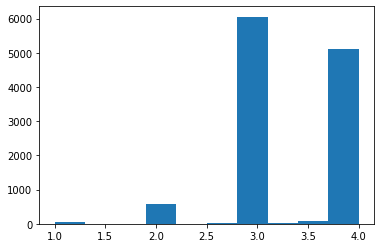

In [53]:
plt.hist(y_pred)

In [82]:
from scipy.stats.stats import pearsonr
pearsonr(y_test,y_pred)

(0.30046390606774875, 1.227908251954447e-247)

/home/ericbertrand8686/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='synthese_eval'>

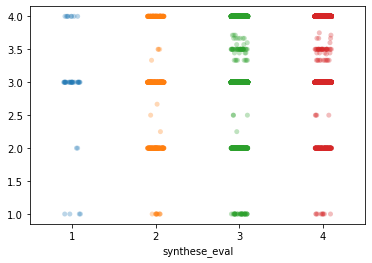

In [74]:
sns.stripplot(y_test,y_pred, jitter=True, alpha=.3)

In [54]:
disp = metrics.plot_confusion_matrix(classifier,X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

/home/ericbertrand8686/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

In [83]:
metrics.plot_roc_curve(classifier, X_test, y_test)

/home/ericbertrand8686/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: Expected 'estimator' to be a binary classifier, but got DecisionTreeRegressor

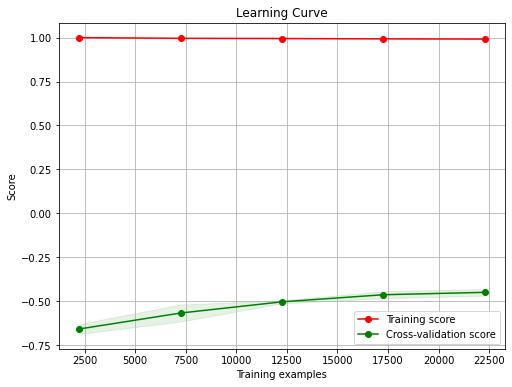

In [84]:
skplt.estimators.plot_learning_curve(classifier, X_train, y_train, figsize=(8,6))   
plt.title('Learning Curve')
plt.show()

In [ ]:
from sklearn import tree
tree.plot_tree(classifier)